<a href="https://colab.research.google.com/github/alirezash97/Computer-Vision/blob/main/mini%20assignment/ColourImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

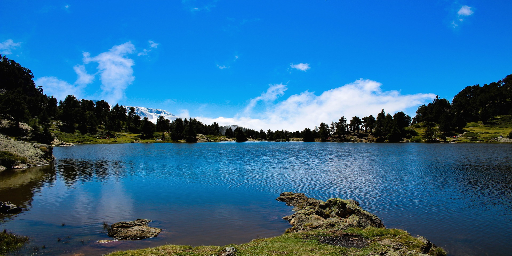

In [7]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

image = cv2.imread('/content/image.jpg')
image = cv2.resize(image, (512, 256))
cv2_imshow(image)

In [5]:
print(image.shape)

(256, 512, 3)


In [19]:
def rgb2cmy(image):
  
  output = np.zeros_like(image)
  for k in range(image.shape[2]):
    for i in range(image.shape[0]):
      for j in range(image.shape[1]):
        output[i, j, k] = 255 - image[i, j, k]
  
  return output



------------------------ Original image ------------------------



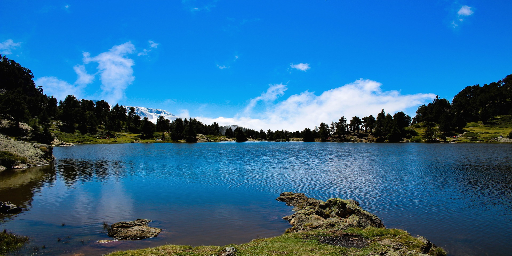


------------------------ C channel -----------------------------



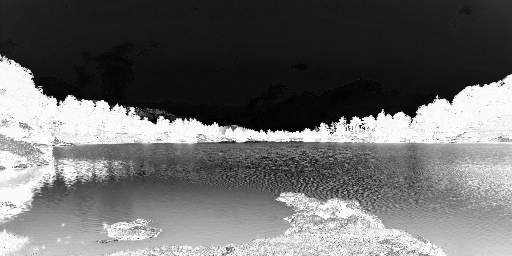


------------------------- M channel ---------------------------



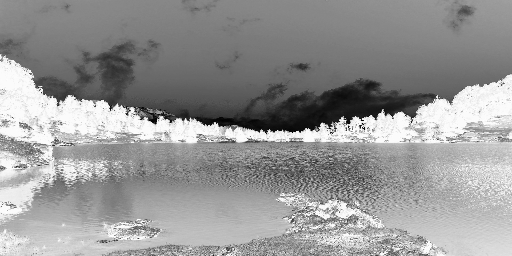


-------------------------- Y channel ---------------------------



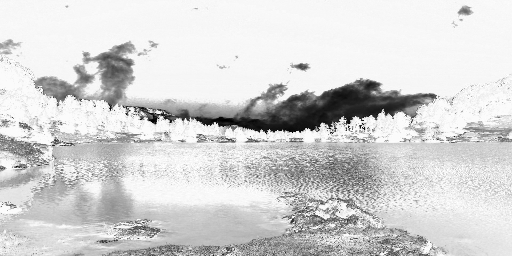


--------------------------- CMY output --------------------------



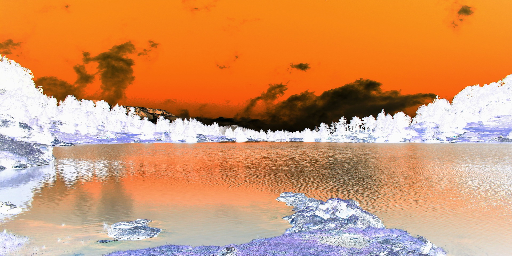

In [30]:
cmy_image = rgb2cmy(image)
print()
print("------------------------ Original image ------------------------")
print()
cv2_imshow(image)
print()
print("------------------------ C channel -----------------------------")
print()
cv2_imshow(cmy_image[:, :, 0])
print()
print("------------------------- M channel ---------------------------")
print()
cv2_imshow(cmy_image[:, :, 1])
print()
print("-------------------------- Y channel ---------------------------")
print()
cv2_imshow(cmy_image[:, :, 2])
print()
print("--------------------------- CMY output --------------------------")
print()
cv2_imshow(cmy_image)

In [22]:
def rgb2yuv(image):

  output = np.zeros_like(image)
  for k in range(image.shape[2]):
    
    if k == 0:
      for i in range(image.shape[0]):
        for j in range(image.shape[1]):
          output[i, j, k] = int(image[i, j, 0]*0.299 + image[i, j, 1]*0.587 + image[i, j, 0]*0.114)
    if k == 1:
      for i in range(image.shape[0]):
        for j in range(image.shape[1]):
          output[i, j, k] = int(0.492* (image[i, j, 2] - output[i, j, 0]))
    if k == 2:
      for i in range(image.shape[0]):
        for j in range(image.shape[1]):
          output[i, j, k] = int(0.877* (image[i, j, 0] - output[i, j, 0]))
  
  return output  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in ubyte_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in ubyte_scalars



------------------------ Original image ------------------------



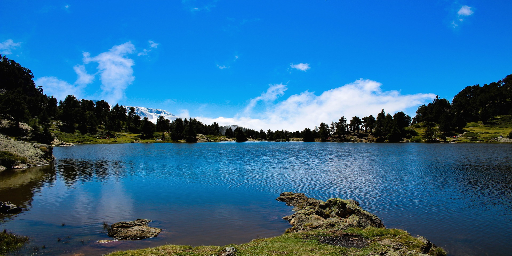


------------------------ Y channel -----------------------------



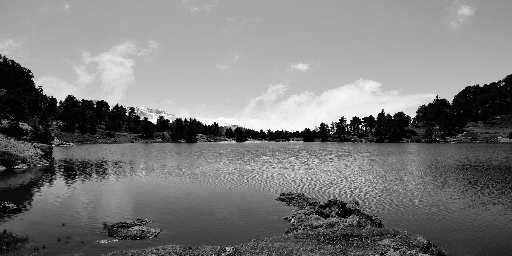


------------------------- U channel ---------------------------



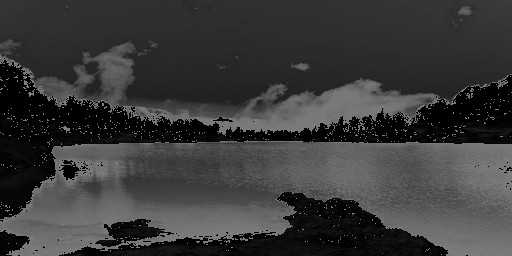


-------------------------- V channel ---------------------------



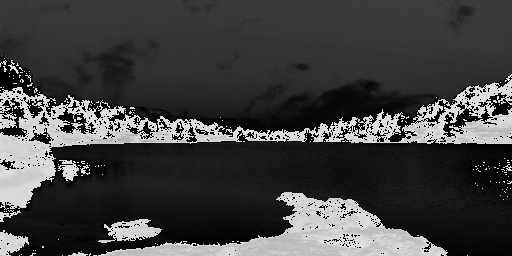


--------------------------- YUV output --------------------------



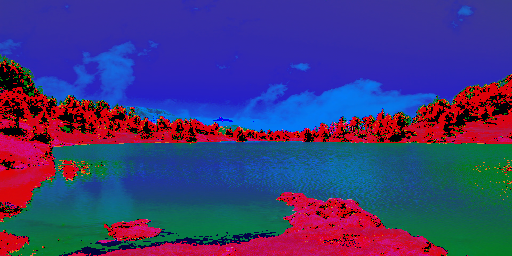

In [68]:
yuv_image = rgb2yuv(image)
print()
print("------------------------ Original image ------------------------")
print()
cv2_imshow(image)
print()
print("------------------------ Y channel -----------------------------")
print()
cv2_imshow(yuv_image[:, :, 0])
print()
print("------------------------- U channel ---------------------------")
print()
cv2_imshow(yuv_image[:, :, 1])
print()
print("-------------------------- V channel ---------------------------")
print()
cv2_imshow(yuv_image[:, :, 2])
print()
print("--------------------------- YUV output --------------------------")
print()
cv2_imshow(yuv_image)

In [66]:
def rgb2hls(image):

  epsilon = 0.0001
  threshold = 0.5
  output = np.zeros_like(image)
  for k in range(image.shape[2]):
    
    if k == 0:
      for i in range(image.shape[0]):
        for j in range(image.shape[1]):
          output[i, j, k] = int( (max(image[i, j, :]) + min(image[i, j, :]) / 2))
    elif k == 1:
      for i in range(image.shape[0]):
        for j in range(image.shape[1]):
          if output[i, j, 0] < threshold:
            output[i, j, k] = int((max(image[i, j, :]) - min(image[i, j, :])) / (max(image[i, j, :]) + min(image[i, j, :])))
          elif output[i, j, 0] >= threshold:
 
            output[i, j, k] = int(max(image[i, j, :]) - min(image[i, j, :]) / 2 - (max(image[i, j, :]) + min(image[i, j, :])))

    elif k == 2:
      for i in range(image.shape[0]):
        for j in range(image.shape[1]):
          if image[i, j, 0] == max(image[i, j, :]):
            output[i, j, k] = int( 60 * (image[i, j, 1] - image[i, j, 2]) / (output[i, j, 1] + epsilon))
          elif image[i, j, 1] == max(image[i, j, :]):
            output[i, j, k] = int(120 + 60 * (image[i, j, 2] - image[i, j, 0]) / (output[i, j, 1] + epsilon) )
          elif image[i, j, 2] == max(image[i, j, :]):
            output[i, j, k] = int(240 + 60*(image[i, j, 0] - image[i, j, 1]) / (output[i, j, 1] + epsilon) )
  
  return output 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in ubyte_scalars



------------------------ Original image ------------------------



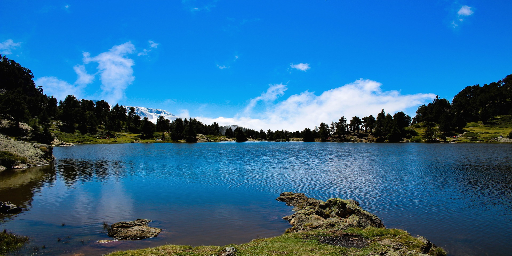


------------------------ H channel -----------------------------



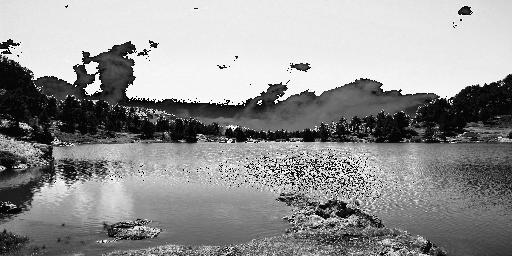


------------------------- L channel ---------------------------



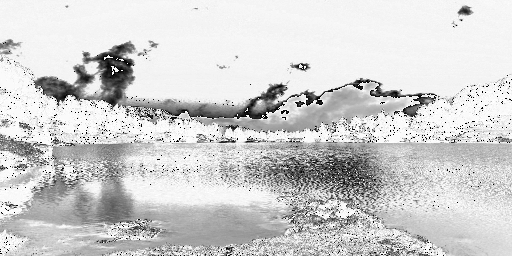


-------------------------- S channel ---------------------------



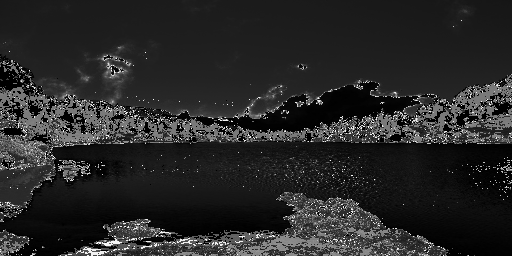


--------------------------- HLS output --------------------------



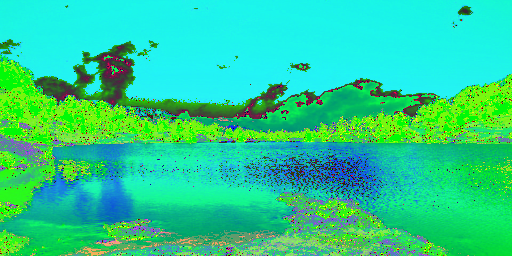

In [67]:
hls_image = rgb2hls(image)
print()
print("------------------------ Original image ------------------------")
print()
cv2_imshow(image)
print()
print("------------------------ H channel -----------------------------")
print()
cv2_imshow(hls_image[:, :, 0])
print()
print("------------------------- L channel ---------------------------")
print()
cv2_imshow(hls_image[:, :, 1])
print()
print("-------------------------- S channel ---------------------------")
print()
cv2_imshow(hls_image[:, :, 2])
print()
print("--------------------------- HLS output --------------------------")
print()
cv2_imshow(hls_image)